# Trabalho de Inteligência Artificial

<h3>Integrantes</h3>
<table width="300" border="2">
    <tr>
        <td><b>Nome do Aluno</b> </td>
        <td><b>RA</b></td>
     </tr>  
   <tr>
       <td>Álvaro Hibide Claver </td>
       <td>10368757</td>
   </tr>
   <tr>
       <td>Matheus Marçal Ramos de Oliveira/td>
       <td>10409001</td>
   </tr>
   <tr>
       <td>Sabrina Midori Futami Teixeira de Carvalho</td>
       <td>10410220</td>
</table>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Iniciando Tratamento de Dados

In [ ]:
csv_path = "/content/pet_adoption_data.csv"
df = pd.read_csv(csv_path)

In [ ]:
print("Colunas do dataset:", df.columns.tolist())

Colunas do dataset: ['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner', 'AdoptionLikelihood']


### Limpeza e normalização simples

In [ ]:
# Remover a coluna PetID, por ser irrelevante
df = df.drop(columns=["PetID"])

In [ ]:
# Remover a coluna WeightKg, por ser irrelevante
df = df.drop(columns=["WeightKg"])

In [ ]:
# Verificando se existe nulidade nas colunas do df
print(df.isnull().sum())

PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64


### Verificando se os valores binários são apenas 0 ou 1

In [ ]:
binarias = ["Vaccinated", "HealthCondition", "PreviousOwner", "AdoptionLikelihood"]

for col in binarias:
    print(f"{col} → valores únicos antes: {df[col].unique()}")
    df[col] = df[col].apply(lambda x: 1 if x > 1 else (0 if x < 0 else x))
    print(f"{col} → valores únicos depois: {df[col].unique()}")


Vaccinated → valores únicos antes: [1 0]
Vaccinated → valores únicos depois: [1 0]
HealthCondition → valores únicos antes: [0 1]
HealthCondition → valores únicos depois: [0 1]
PreviousOwner → valores únicos antes: [0 1]
PreviousOwner → valores únicos depois: [0 1]
AdoptionLikelihood → valores únicos antes: [0 1]
AdoptionLikelihood → valores únicos depois: [0 1]


In [ ]:
# Filtrando apenas linhas onde PetType == "Cat" ou PetType == "Dog" e resetando o index original
df_cats = df[df["PetType"] == "Cat"].reset_index(drop=True)
df_dogs = df[df["PetType"] == "Dog"].reset_index(drop=True)

In [ ]:
# Mostrando resultado com gatos apenas
print(f"Total de registros: {len(df_cats)}")
print(f"Registros apenas com gatos: {len(df_cats)}\n")

df_cats.head()

Total de registros: 505
Registros apenas com gatos: 505



,PetType,Breed,AgeMonths,Color,Size,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Cat,Siamese,13,Orange,Large,1,0,3,137,0,1
1,Cat,Siamese,27,Black,Large,1,0,5,135,0,0
2,Cat,Persian,160,Brown,Medium,1,0,11,404,0,1
3,Cat,Persian,8,Orange,Small,1,1,64,405,1,0
4,Cat,Persian,50,White,Medium,1,0,13,109,0,1


In [ ]:
# Mostrando resultado com cachorros apenas
print(f"Total de registros: {len(df_dogs)}")
print(f"Registros apenas com gatos: {len(df_dogs)}\n")

df_dogs.head()

Total de registros: 522
Registros apenas com gatos: 522



,PetType,Breed,AgeMonths,Color,Size,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Dog,Golden Retriever,136,Orange,Medium,0,0,85,385,0,0
1,Dog,Labrador,70,Brown,Large,0,0,87,301,1,0
2,Dog,Golden Retriever,172,Brown,Large,1,0,4,76,1,0
3,Dog,Labrador,44,Gray,Small,0,1,6,300,0,0
4,Dog,Labrador,3,Gray,Large,1,0,50,369,1,1


### Tratamento colunas categóricas para conversão numérica para uso com ML

Como algoritmos de Machine Learning não trabalham diretamente com variáveis categóricas (não numéricas), foi necessário converter essas variáveis em representações numéricas. Para isso, realizou-se a transformação em valores binários/booleanos, geralmente representados por 0 e 1.

In [ ]:
# Gatos
categoricas = ["Breed", "Color", "Size"]
print("Colunas categóricas - Gatos:", categoricas)

# Transformando em variáveis binárias (0/1)
df_cats_encoded = pd.get_dummies(df_cats, columns=categoricas)

print(df_cats_encoded.head())


Colunas categóricas - Gatos: ['Breed', 'Color', 'Size']
  PetType  AgeMonths  Vaccinated  HealthCondition  TimeInShelterDays  \
0     Cat         13           1                0                  3   
1     Cat         27           1                0                  5   
2     Cat        160           1                0                 11   
3     Cat          8           1                1                 64   
4     Cat         50           1                0                 13   

   AdoptionFee  PreviousOwner  AdoptionLikelihood  Breed_Persian  \
0          137              0                   1          False   
1          135              0                   0          False   
2          404              0                   1           True   
3          405              1                   0           True   
4          109              0                   1           True   

   Breed_Siamese  Color_Black  Color_Brown  Color_Gray  Color_Orange  \
0           True        False 

In [ ]:
# Cachorros
categoricas = ["Breed", "Color", "Size"]
print("Colunas categóricas - Cachorros:", categoricas)

# Transformando em variáveis binárias (0/1)
df_dogs_encoded = pd.get_dummies(df_dogs, columns=categoricas)

print(df_dogs_encoded.head())


Colunas categóricas - Cachorros: ['Breed', 'Color', 'Size']
  PetType  AgeMonths  Vaccinated  HealthCondition  TimeInShelterDays  \
0     Dog        136           0                0                 85   
1     Dog         70           0                0                 87   
2     Dog        172           1                0                  4   
3     Dog         44           0                1                  6   
4     Dog          3           1                0                 50   

   AdoptionFee  PreviousOwner  AdoptionLikelihood  Breed_Golden Retriever  \
0          385              0                   0                    True   
1          301              1                   0                   False   
2           76              1                   0                    True   
3          300              0                   0                   False   
4          369              1                   1                   False   

   Breed_Labrador  Breed_Poodle  Color_Black

### Export csv tratado

In [ ]:
df_cats_encoded.to_csv("/content/pet_adoption_data_cats_clean.csv", index=False)

In [ ]:
df_dogs_encoded.to_csv("/content/pet_adoption_data_dogs_clean.csv", index=False)

### Análise Exploratória

In [ ]:
cats = pd.read_csv("pet_adoption_data_cats_clean.csv")
dogs = pd.read_csv("pet_adoption_data_dogs_clean.csv")

Inicialmente, vamos analisar a população de gatos e cachorros, em termos de idade (meses).

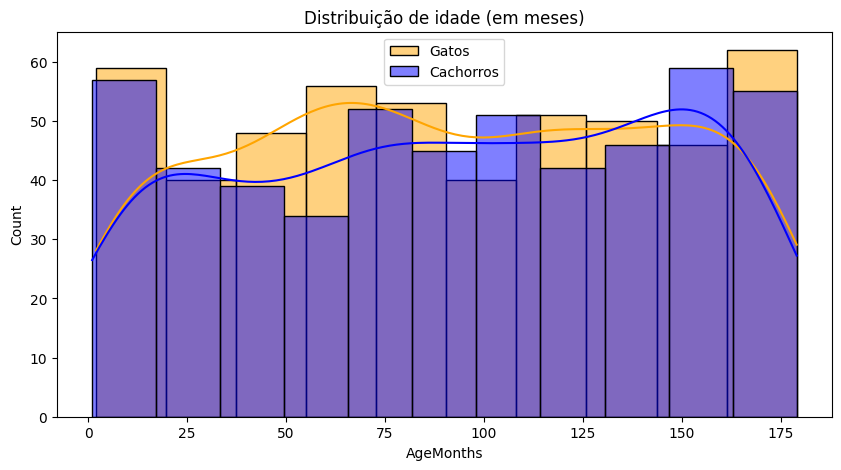

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(cats["AgeMonths"], kde=True, color="orange", label="Gatos")
sns.histplot(dogs["AgeMonths"], kde=True, color="blue", label="Cachorros")
plt.legend()
plt.title("Distribuição de idade (em meses)")
plt.show()

A distribuição de idades de gatos e cachorros no dataset mostra-se bastante semelhante, sem grandes diferenças estruturais entre as espécies. Observa-se uma leve predominância de jovens adultos, especialmente entre 60 e 80 meses (~5 a 6 anos), além de uma concentração expressiva de indivíduos jovens até 25 meses, com os cachorros ligeiramente mais representados nessa faixa inicial. Já nas idades mais avançadas, acima de 150 meses (cerca de 12 anos), ainda há presença significativa de animais idosos em ambos os grupos, indicando que o conjunto de dados não está enviesado apenas para filhotes.


Agora, vamos comparar a probabilidade de adoção entre gatos e cachorros.

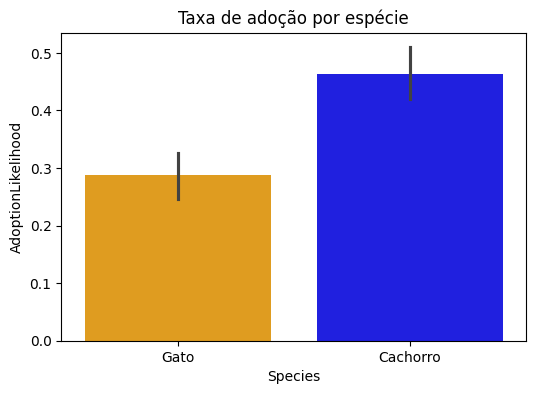

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="Species",
    y="AdoptionLikelihood",
    hue="Species",
    data=combined,
    estimator=lambda x: sum(x)/len(x),
    palette={"Gato": "orange", "Cachorro": "blue"},
    legend=False
)
plt.title("Taxa de adoção por espécie")
plt.show()

O gráfico evidencia que a taxa média de adoção registrada no dataset é maior para cachorros (46%) do que para gatos (29%), indicando que cães apresentam uma probabilidade relativamente mais elevada de encontrarem um lar. Essa diferença sugere que fatores associados à espécie podem influenciar na decisão dos adotantes, embora seja importante considerar que outros atributos — como idade, porte, condição de saúde e custos envolvidos — também podem contribuir para esse resultado. Assim, a análise aponta uma tendência relevante, mas que deve ser interpretada em conjunto com demais variáveis para evitar conclusões simplistas. texto em negrito

Passemos à análise do tempo de permanência de gatos e cachorros no abrigo.

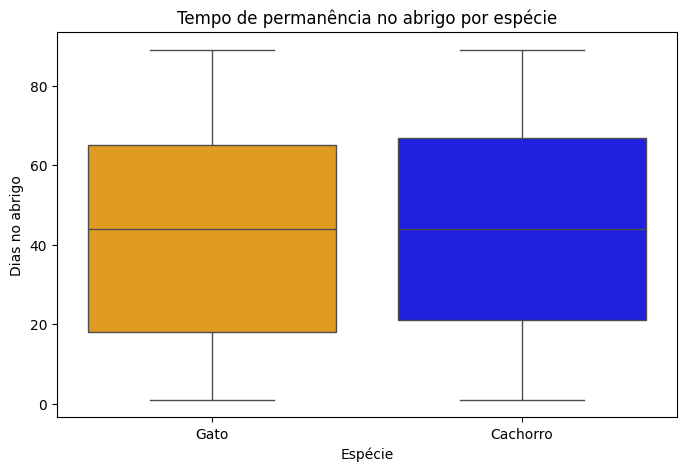

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Species",
    y="TimeInShelterDays",
    hue="Species",
    data=combined,
    palette={"Gato": "orange", "Cachorro": "blue"},
    legend=False
)
plt.title("Tempo de permanência no abrigo por espécie")
plt.ylabel("Dias no abrigo")
plt.xlabel("Espécie")
plt.show()

O boxplot mostra que o tempo de permanência no abrigo é semelhante entre gatos e cachorros, com medianas próximas e ampla variação nos dois grupos. No entanto, observa-se que gatos tendem a concentrar mais casos de longas esperas, indicando que, quando não são adotados rapidamente, permanecem por períodos maiores no abrigo, enquanto os cachorros apresentam uma distribuição mais homogênea ao longo do tempo.

Analisando o tempo despendido no abrigo entre animais adotados e não adotados, temos o seguinte resultado:

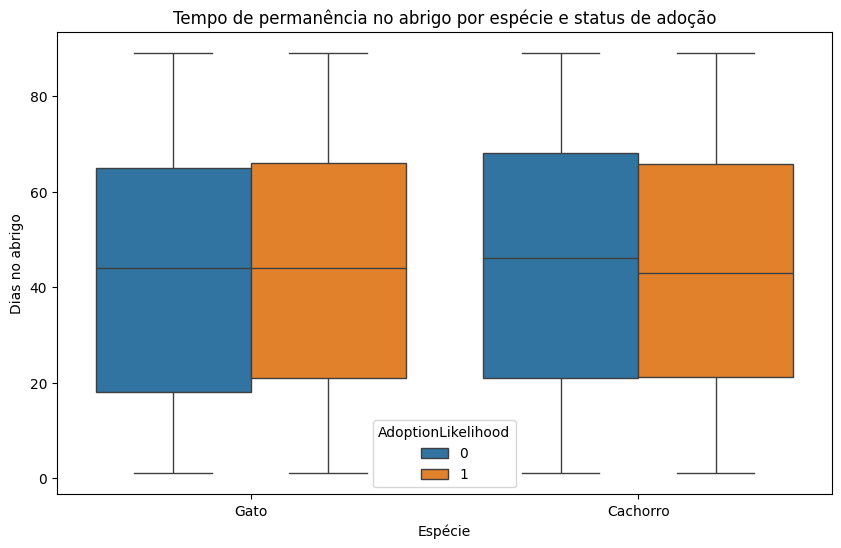

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Species", y="TimeInShelterDays", hue="AdoptionLikelihood", data=combined)
plt.title("Tempo de permanência no abrigo por espécie e status de adoção")
plt.ylabel("Dias no abrigo")
plt.xlabel("Espécie")
plt.show()

O gráfico mostra que o **tempo de permanência no abrigo** varia de forma parecida entre gatos e cachorros, tanto para os animais que foram adotados (1) quanto para os que não foram (0). Em ambas as espécies, a mediana dos dias no abrigo é próxima, mas percebe-se que os animais adotados tendem a permanecer um pouco menos tempo em comparação aos que não foram adotados. Isso indica que, independentemente da espécie, a chance de adoção está associada a uma redução no período de estadia, ainda que a distribuição geral dos tempos apresente grande variação nos dois grupos.